## CSC 271 - Intro to Data Science 
## Thurs, Jan 30
## Lesson 03
## Image manipulation, part 1

https://scikit-image.org/

In [ ]:
#Note: you may need to install scikit-image

%pip install scikit-image

In [5]:
import numpy as np
from skimage import data, io
import matplotlib.pyplot as plt
import matplotlib

 data type of image   =  <class 'numpy.ndarray'>
 data type of a pixel =  <class 'numpy.uint8'>
 shape =  (512, 512)
 top left pixel =  200
 bottom left pixel =  25


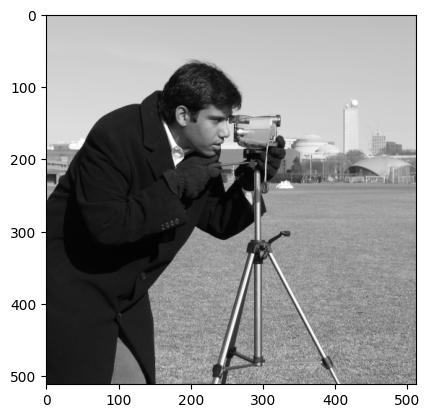

In [11]:
# There are several ways to load image data, including a few preloaded images: 
#    astronaut, binary_blobs, brick, colorwheel, camera, cat, 
#    checkerboard, clock, coffee, coins, grass, gravel, horse, 
#    logo, page, text, rocket, moon, retina, hubble_deep_field

image = data.camera() 

print(' data type of image   = ',type(image))
print(' data type of a pixel = ',type(image[0,0]))
print(' shape = ',image.shape)
print(' top left pixel = ',image[0,0])
print(' bottom left pixel = ',image[511,0])

plt.imshow(image,cmap='gray')

## Task 1: Grayscale images and slicing

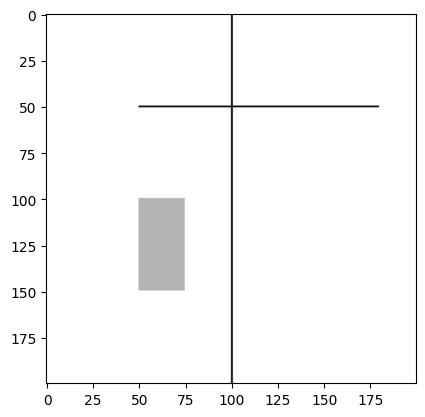

In [49]:
# Let's first explore the structure of grayscale images
# black=0 ... white=255

img2=255*np.ones([200,200])  # <-- a 200x200 array of 255 (i.e., white)

img2[:,100]=0
img2[50,50:180]=20
img2[100:150,50:75]=180

plt.imshow(img2,cmap='gray')
plt.show()

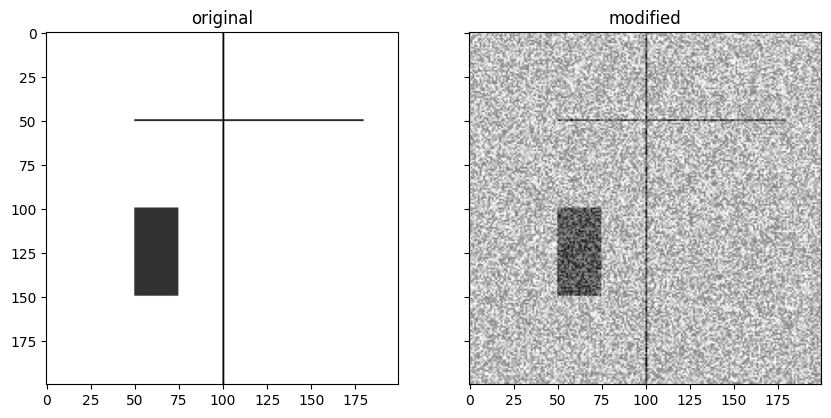

In [16]:
noise = 255*np.random.rand(200,200)

img3 = img2+noise  

fig, (p1, p2) = plt.subplots(1, 2,sharey=True,figsize=(10, 5))
p1.imshow(img2,cmap='gray')
p2.imshow(img3,cmap='gray')
p1.set_title('original')
p2.set_title('modified')
plt.show()

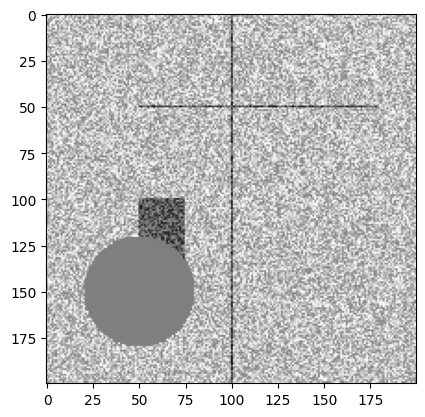

In [20]:
# this will create a 200x200 array of booleans we can use as a mask
region = np.full((200,200), True)

for i in range(200):
    for j in range(200):
        region[i,j]= np.sqrt( (i-150)**2+(j-50)**2 ) < 30 #150 and 50 are the center coordinates of the circle
        
# change only pixels in the region to black (i.e., 0)
img3[region] = 255

plt.imshow(img3,cmap='gray')
plt.show()

In [ ]:
# slice through the mask horizontally 

region[150,:]

## Task 2: Color images and filtering

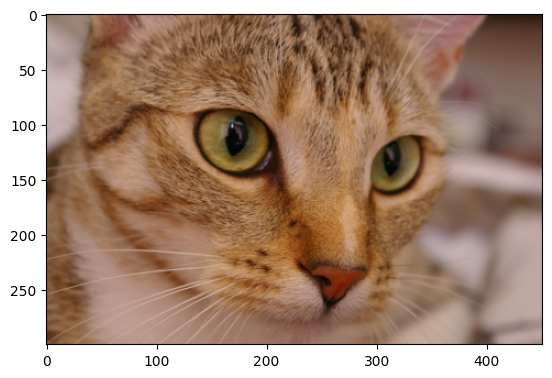

In [21]:
pic = data.cat() 

plt.imshow(pic)
plt.show()

In [ ]:
pic.shape #takes three input for rgb for the colors

In [24]:
# take note of the data type here ... 
pic[0,0]

array([143, 120, 104], dtype=uint8)

### We need a little diversion into data types ...

https://numpy.org/doc/stable/user/basics.types.html

In [ ]:
pic[0:150,:]=0.5*pic[0:150,:]
plt.imshow(pic)
plt.show()

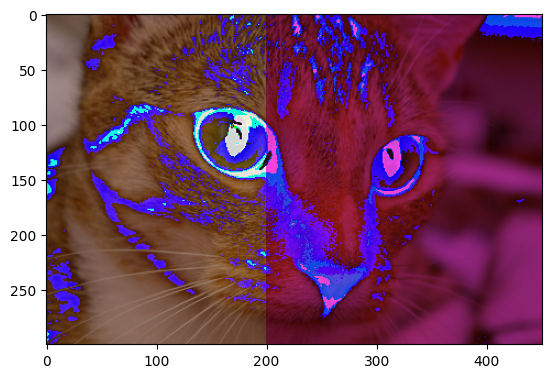

In [93]:
pic[:,200:,1]=0.3*pic[:,200:,1]
plt.imshow(pic)
plt.show()


In [ ]:
# let's start fresh ...
pic = data.cat() 

pic[:,:]=pic[:,:]-50   # <--- what's going on here? 
plt.imshow(pic)
plt.show()

In [ ]:
pic = data.cat() 
print(' *** look at the red channel of the top left pixel and its data type ***')
print('top pixel red = ',pic[0,0,0])
print('data type = ',type(pic[0,0,0]))

print('\n *** add 200 to the red value ... int + uint8 -> int')
print('top pixel red + 200 = ',pic[0,0,0]+200)
print('data type = ',type(pic[0,0,0]+200))

print('\n *** addition within the uint8 type ... uint8 + uint8 -> uint8')
pic[0,0,0] = pic[0,0,0] + 200
print('top pixel red + 200 = ',pic[0,0,0])
print('data type = ',type(pic[0,0,0]))

In [39]:
x=100
print('x = ',x,' with type ',type(x))

y=np.uint8(100)
print('y = ',y,' with type ',type(y))

x =  100  with type  <class 'int'>
y =  100  with type  <class 'numpy.uint8'>


In [40]:
print(x)
print(x+x)
print(x+x+x)
print('\n')
print(y)
print(y+y)
print(y+y+y) #wraps around and restart after 256

100
200
300


100
200
44


C:\Users\User\AppData\Local\Temp\ipykernel_22112\3013756887.py:7: RuntimeWarning: overflow encountered in scalar add
  print(y+y+y)


## Task 3: Loading images from files and cropping

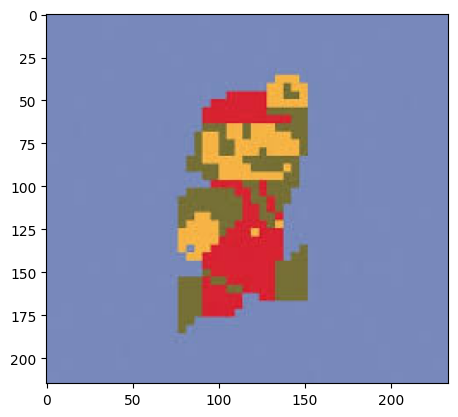

In [41]:
# loading images and working with color

mario=io.imread('data/mario.jpeg')
plt.imshow(mario)
plt.show()

In [42]:
mario.shape #color image rows, column, and channel

(215, 234, 3)

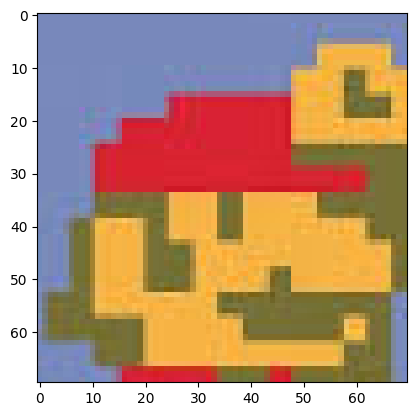

In [43]:
# using slicing to crop
mario_crop = mario[30:100,80:150]

plt.imshow(mario_crop)
plt.show()

In [44]:
mario_crop[25,35]

array([217,  34,  52], dtype=uint8)

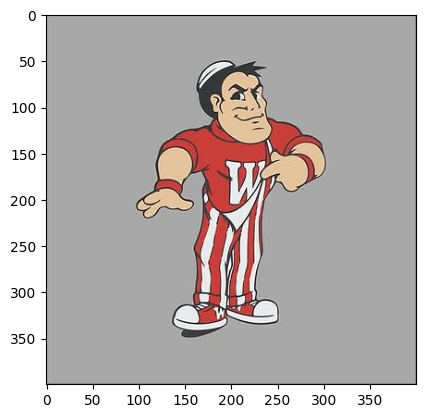

In [45]:
wally=io.imread('data/wally.jpeg')

plt.imshow(wally)
plt.show()

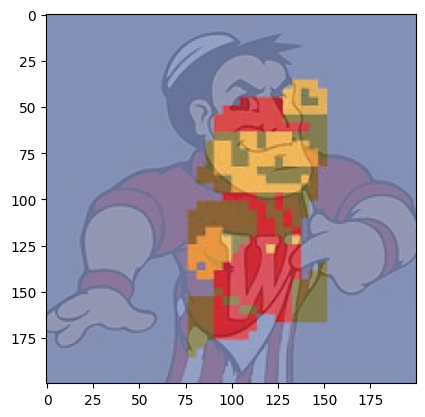

In [47]:
# can we combine images? 
wally=io.imread('data/wally.jpeg')
mario=io.imread('data/mario.jpeg')

img_1 = wally[40:240,100:300,:]
img_2 = mario[0:200,0:200,:]
img_3 = img_1+img_2
img_3 = np.uint8(0.25*img_1)+np.uint8(0.75*img_2)

plt.imshow(img_3)
plt.show()
# yes, but probably isn't what we really want ...

## In-Class Exercises

(1) Load the image of the camera guy as below,


      image = data.camera()
      plt.imshow(image,cmap='gray')

then write code to create the grayscale negative image.  

(2) Load a predefined color image of your choice, then write code to create the color negative image by modifying the values of each color channel. 

(3) Load the Wally image, then create three new filtered images, **wally_red**, **wally_green**, and **wally_blue**, that contain only the red, green, and blue channels.  For example, each pixel in **wally_red** has zero values for the green and blue channels. 

(4) Create a new image, in a size of your choice, then write code to copy both Wally and Mario into the image.  They should be side by side and both visible ... they're friends.  


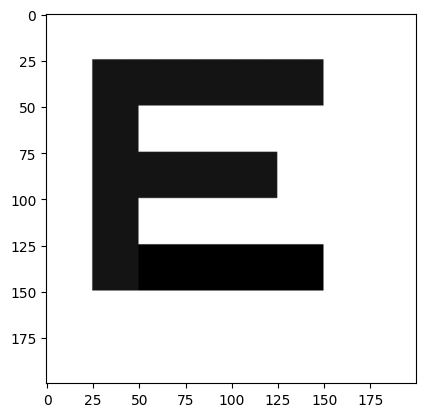

In [69]:
img2=255*np.ones([200,200])

img2[25:150,25:50]=20
img2[25:50,25:150]=20
img2[75:100,50:125]=20
img2[125:150,50:150] = 0
#img2[100:150,50:75]=180

plt.imshow(img2,cmap='gray')
plt.show()



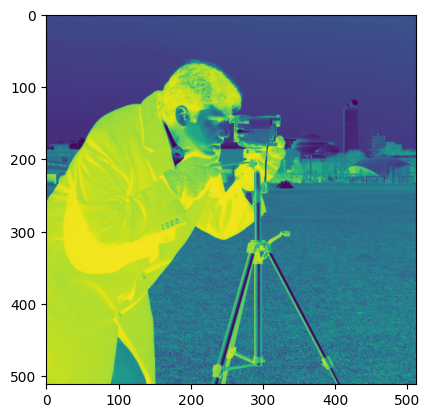

In [72]:
image = data.camera()

image[:,:]=255 - image[:,:]

plt.imshow(image)

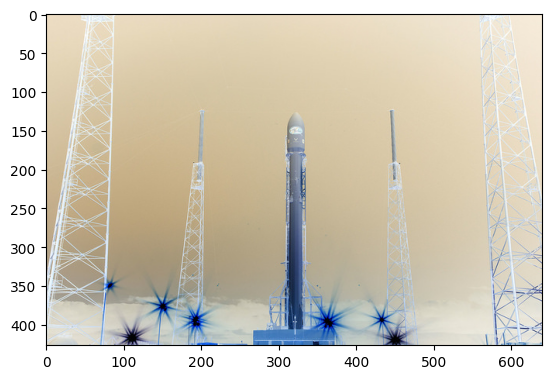

In [75]:
image = data.rocket()

image[:,:,:] = 255 - image[:,:,:]
plt.imshow(image)

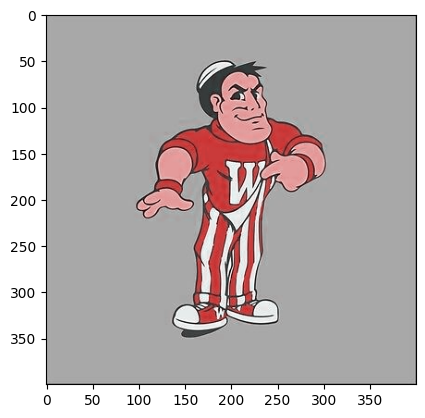

In [92]:
wally=io.imread('data/wally.jpeg')

wally[:,:,1] = wally[:,:,2]

plt.imshow(wally)

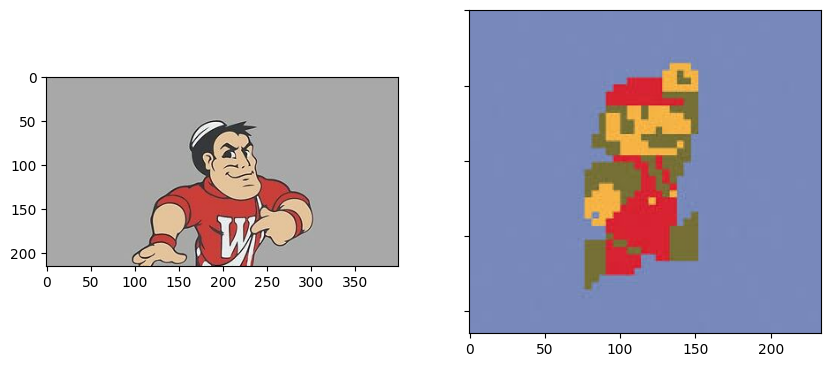

In [99]:
wally=io.imread('data/wally.jpeg')
mario =io.imread("data/mario.jpeg")

blank_canvas = np.ones([500, 500,3])

fig, (p1, p2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
p1.imshow(wally)
p2.imshow(mario)





"""fig, (p1, p2) = plt.subplots(1, 2,sharey=True,figsize=(10, 5))
p1.imshow(img2,cmap='gray')
p2.imshow(img3,cmap='gray')
p1.set_title('original')
p2.set_title('modified')"""
plt.show()